# Day 7 Assignment

__Case Study:__
Problem Statement A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -
The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners.
A sizeable department has to be maintained, for the purposes of recruiting new talent.
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company.
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.
Since you are one of the star analysts at the firm, this project has been given to you.
Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Dataset=pd.read_csv("general_data.csv")

In [3]:
Dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
Dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [5]:
Dataset.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
Dataset=Dataset.dropna()

In [7]:
Dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4404    False
4405    False
4406    False
4407    False
4408    False
Length: 4382, dtype: bool

In [8]:
Dataset=Dataset.drop_duplicates()

__Univariant Analysis:__

In [9]:
Dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [10]:
Dataset.median()

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
EmployeeCount                  1.0
EmployeeID                  2208.5
JobLevel                       2.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StandardHours                  8.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [11]:
Dataset.mode()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35.0,No,Travel_Rarely,Research & Development,2.0,3.0,Life Sciences,1.0,1,Male,...,1.0,Y,11.0,8.0,0.0,10.0,2.0,5.0,0.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4405,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4406,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4407,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4408,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
Dataset.var()

Age                        8.348974e+01
DistanceFromHome           6.569744e+01
Education                  1.050068e+00
EmployeeCount              0.000000e+00
EmployeeID                 1.617192e+06
JobLevel                   1.223490e+00
MonthlyIncome              2.222397e+09
NumCompaniesWorked         6.239165e+00
PercentSalaryHike          1.341762e+01
StandardHours              0.000000e+00
StockOptionLevel           7.265814e-01
TotalWorkingYears          6.061739e+01
TrainingTimesLastYear      1.662558e+00
YearsAtCompany             3.756894e+01
YearsSinceLastPromotion    1.040059e+01
YearsWithCurrManager       1.274257e+01
dtype: float64

In [13]:
Dataset.skew()

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
EmployeeCount              0.000000
EmployeeID                -0.002335
JobLevel                   1.021797
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
StandardHours              0.000000
StockOptionLevel           0.967263
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

In [14]:
Dataset.kurt()

Age                       -0.409517
DistanceFromHome          -0.230691
Education                 -0.565008
EmployeeCount              0.000000
EmployeeID                -1.198607
JobLevel                   0.388189
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
StandardHours              0.000000
StockOptionLevel           0.356755
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64

__Inference:__

1)Employee Count and Standard Hours are showing Zero Skewness, Education and Employee Id are showing Negative Skewness and rest all variables are showing Positive Skewness.

2)Employee Count and Standard Hours are Mesokurtic, Age, Distance from Home,Education,Employee Id and Percent Salary Hike are Platykurtic and rest all variables are Leptokurtic.

__Outliers:__

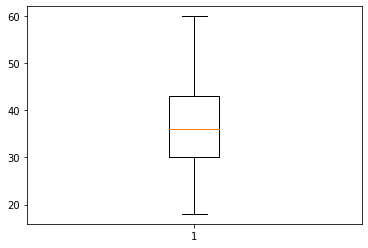

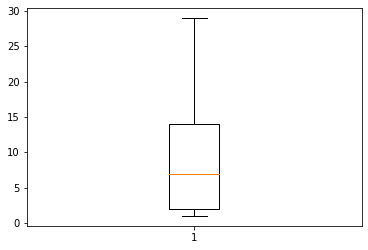

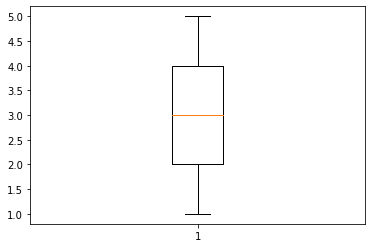

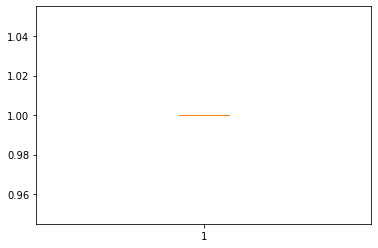

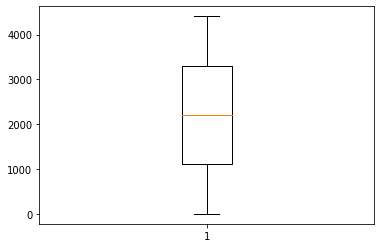

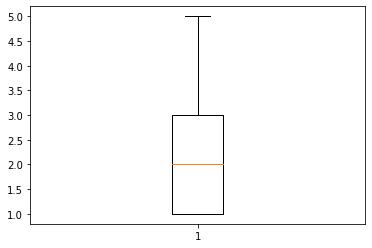

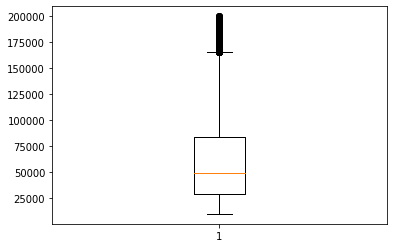

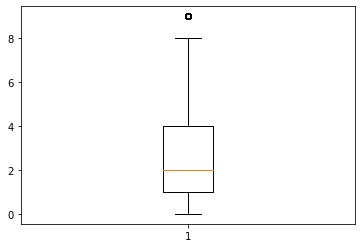

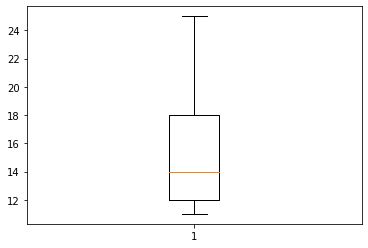

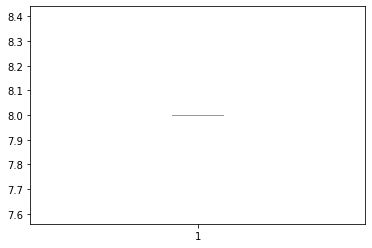

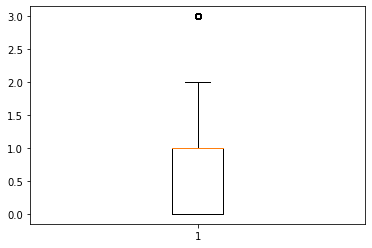

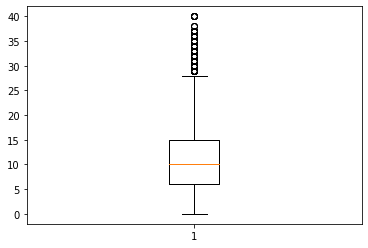

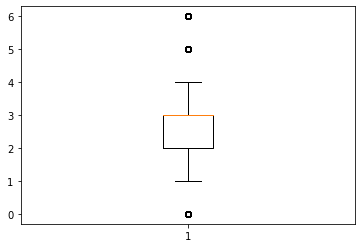

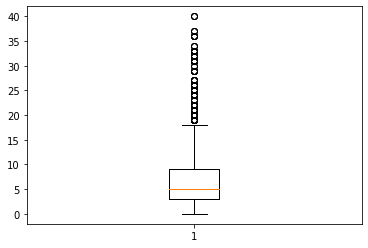

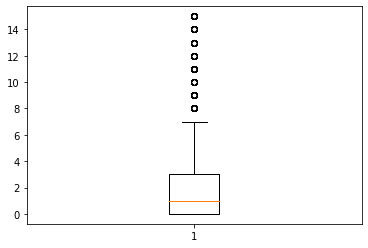

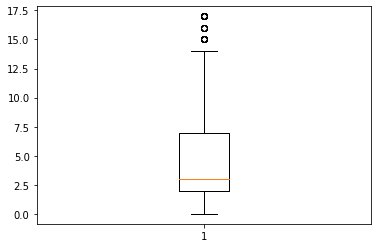

In [28]:
columns = ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID','JobLevel','MonthlyIncome', 
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours','StockOptionLevel',
       'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']

for g in columns:
    fig, ax = plt.subplots()
    ax.boxplot(Dataset[g])

__Inference:__

There are outliers in MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,
YearsWithCurrManager 

__Correlation Analysis:__

In [31]:
from sklearn import preprocessing
Label_encoder=preprocessing.LabelBinarizer()
Dataset["Attrition"]=Label_encoder.fit_transform(Dataset["Attrition"])
from scipy.stats import pearsonr

__Attrition vs Age__

__H0 :__ There is no Significant correlation between Attrition and Age.

__Ha :__ There is Significant correlation between Attrition and Age.

In [32]:
stats,p = pearsonr(Dataset.Attrition, Dataset.Age)
print(stats,p)

-0.1583986795409671 5.1265982193780794e-26


__p<0.05 H0 is rejected and Ha is accepted__

__Attrition vs DistanceFromHome__

__H0 :__ There is no Significant correlation between Attrition and DistanceFromHome.

__Ha :__ There is Significant correlation between Attrition and DistanceFromHome.

In [35]:
stats,p = pearsonr(Dataset.Attrition, Dataset.DistanceFromHome)
print(stats,p)

-0.009448638515156248 0.5317715668019558


__p>0.05 H0 is accepted__

__Attrition vs Education__

__H0 :__ There is no Significant correlation between Attrition and Education.

__Ha :__ There is Significant correlation between Attrition and Education.

In [36]:
stats,p = pearsonr(Dataset.Attrition, Dataset.Education)
print(stats,p)

-0.017106307050278723 0.25757539308157945


__p>0.05 H0 is accepted__

__Attrition vs EmployeeID__

H0 : There is no Significant correlation between Attrition and EmployeeID.

Ha : There is Significant correlation between Attrition and EmployeeID.

In [39]:
stats,p = pearsonr(Dataset.Attrition, Dataset.EmployeeID)
print(stats,p)

-0.004620541850379514 0.7597730060918658


__p>0.05 H0 is accepted__

__Attrition vs JobLevel__

H0 : There is no Significant correlation between Attrition and JobLevel.

Ha : There is Significant correlation between Attrition and JobLevel.

In [41]:
stats,p = pearsonr(Dataset.Attrition, Dataset.JobLevel)
print(stats,p)

-0.012381569720790877 0.4125489150380087


__p>0.05 H0 is accepted__

__Attrition vs MonthlyIncome__

H0 : There is no Significant correlation between Attrition and MonthlyIncome.

Ha : There is Significant correlation between Attrition and MonthlyIncome.

In [44]:
stats,p = pearsonr(Dataset.Attrition, Dataset.MonthlyIncome)
print(stats,p)

-0.030160293808460664 0.045890862744719166


__p<0.05 H0 is rejected and Ha is accepted__

__Attrition vs NumCompaniesWorked__

H0 : There is no Significant correlation between Attrition and NumCompaniesWorked.

Ha : There is Significant correlation between Attrition and NumCompaniesWorked.

In [45]:
stats,p = pearsonr(Dataset.Attrition, Dataset.NumCompaniesWorked)
print(stats,p)

0.04283056724472088 0.004572057121620842


__p<0.05 H0 is rejected and Ha is accepted__

__Attrition vs PercentSalaryHike__

H0 : There is no Significant correlation between Attrition and PercentSalaryHike.

Ha : There is Significant correlation between Attrition and PercentSalaryHike.

In [47]:
stats,p = pearsonr(Dataset.Attrition, Dataset.PercentSalaryHike)
print(stats,p)

0.03315303713546665 0.028192446935106235


__p<0.05 H0 is rejected and Ha is accepted__

__Attrition vs StockOptionLevel__

H0 : There is no Significant correlation between Attrition and StockOptionLevel.

Ha : There is Significant correlation between Attrition and StockOptionLevel.

In [49]:
stats,p = pearsonr(Dataset.Attrition, Dataset.StockOptionLevel)
print(stats,p)

-0.008164026684984328 0.588999635831226


__p>0.05 H0 is accepted__

__Attrition vs TotalWorkingYears__

H0 : There is no Significant correlation between Attrition and TotalWorkingYears.

Ha : There is Significant correlation between Attrition and TotalWorkingYears.

In [50]:
stats,p = pearsonr(Dataset.Attrition, Dataset.TotalWorkingYears)
print(stats,p)

-0.1696699168472392 1.1645434967091854e-29


__p<0.05 H0 is rejected and Ha is accepted__

__Attrition vs TrainingTimesLastYear__

H0 : There is no Significant correlation between Attrition and TrainingTimesLastYear.

Ha : There is Significant correlation between Attrition and TrainingTimesLastYear.

In [51]:
stats,p = pearsonr(Dataset.Attrition, Dataset.TrainingTimesLastYear)
print(stats,p)

-0.04758573693081737 0.0016276603635477602


__p<0.05 H0 is rejected and Ha is accepted__

__Attrition vs YearsAtCompany__

H0 : There is no Significant correlation between Attrition and YearsAtCompany.

Ha : There is Significant correlation between Attrition and YearsAtCompany.

In [52]:
stats,p = pearsonr(Dataset.Attrition, Dataset.YearsAtCompany)
print(stats,p)

-0.1330026184252154 9.476118084836507e-19


__p<0.05 H0 is rejected and Ha is accepted__

__Attrition vs YearsSinceLastPromotion__

H0 : There is no Significant correlation between Attrition and YearsSinceLastPromotion.

Ha : There is Significant correlation between Attrition and YearsSinceLastPromotion.

In [53]:
stats,p = pearsonr(Dataset.Attrition, Dataset.YearsSinceLastPromotion)
print(stats,p)

-0.03142315056330995 0.03752293607395154


__p<0.05 H0 is rejected and Ha is accepted__

__Attrition vs YearsWithCurrManager__

H0 : There is no Significant correlation between Attrition and YearsWithCurrManager.

Ha : There is Significant correlation between Attrition and YearsWithCurrManager.

In [54]:
stats,p = pearsonr(Dataset.Attrition, Dataset.YearsWithCurrManager)
print(stats,p)

-0.15469153690287274 7.105369646771178e-25


__p<0.05 H0 is rejected and Ha is accepted__

__Correlation Matrix__

In [60]:
Dataset.corr()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.158399,0.007376,-0.033900,NaN,0.008105,-0.001137,-0.045163,0.299527,-0.032561,NaN,-0.031504,0.680037,-0.028962,0.311281,0.215650,0.201580
Attrition,-0.158399,1.000000,-0.009449,-0.017106,NaN,-0.004621,-0.012382,-0.030160,0.042831,0.033153,NaN,-0.008164,-0.169670,-0.047586,-0.133003,-0.031423,-0.154692
DistanceFromHome,0.007376,-0.009449,1.000000,-0.007491,NaN,-0.000326,-0.039990,-0.022757,-0.014449,0.037720,NaN,0.009353,0.009574,-0.008957,0.030746,0.002243,0.021773
Education,-0.033900,-0.017106,-0.007491,1.000000,NaN,-0.009389,0.045822,0.007289,-0.016210,-0.041054,NaN,0.002386,-0.009228,0.009939,0.005997,0.023457,0.005645
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008105,-0.004621,-0.000326,-0.009389,NaN,1.000000,-0.003090,0.007865,0.000719,-0.004877,NaN,-0.013488,-0.001688,-0.012102,0.004117,0.000814,0.009079
JobLevel,-0.001137,-0.012382,-0.039990,0.045822,NaN,-0.003090,1.000000,0.046688,-0.009759,0.010874,NaN,0.000365,-0.036293,-0.031931,-0.063360,-0.059680,-0.053898
MonthlyIncome,-0.045163,-0.030160,-0.022757,0.007289,NaN,0.007865,0.046688,1.000000,-0.021446,0.004607,NaN,0.027242,-0.034398,0.049780,0.000088,0.064470,0.023095
NumCompaniesWorked,0.299527,0.042831,-0.014449,-0.016210,NaN,0.000719,-0.009759,-0.021446,1.000000,0.030064,NaN,0.016291,0.238807,-0.031335,-0.117213,-0.035855,-0.109372
PercentSalaryHike,-0.032561,0.033153,0.037720,-0.041054,NaN,-0.004877,0.010874,0.004607,0.030064,1.000000,NaN,0.012104,-0.018480,-0.036720,-0.029022,-0.028654,-0.039687


__Most important things to be considered:__

Age,Monthly Income,Number of companies worked,Percent Salary Hike,Total Working Years,Training Times Last Year,
Years at Company,Years Since Last Promotion,Years with Current Manager are significantly correlated with Attrition.

Relooking into above paramters is very important to reduce the Attrition rate.

__Suggestions:__

1)Percent Salary Hike can be increased.

2)Salary can be increased.

3)Frequency of promotion can be reduced.

4)How Manager is treating the Employees also depends.(Should be friendly)

By considering above parameters and Suggestions Attrition can be reduced to the minimum.
